# 1. Implementing K-means

# 1.1 Finding closest centroids

In [1]:
import scipy.io

In [2]:
mat = scipy.io.loadmat('ex7data2.mat')

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [4]:
X = mat['X']
X.shape

(300, 2)

In [5]:
import numpy as np

In [6]:
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]]) #index 0,1,2
initial_centroids.shape

(3, 2)

In [7]:
def findClosetCentroids(X, centroids):
    [m,n] = X.shape
    idx = np.zeros(m)
    K = centroids.shape[0]
    for i in range(0,m):
        min = 1000
        for j in range(0,K):
            dis = np.linalg.norm(X[i,:]-centroids[j,:])
            if(dis < min):
                idx[i] = j
                min = dis
    return idx

In [8]:
idx = findClosetCentroids(X, initial_centroids)

In [10]:
print('Closet centroids for the first 3 examples:',idx[0:3])

Closet centroids for the first 3 examples: [0. 2. 1.]


# 1.2 Copmuting centroids means

In [11]:
def computeCentroids(X, idx, K):
    [m,n] = X.shape
    centroids = np.zeros((K,n))
    for i in range(0,K):
        pos = np.argwhere(idx == i);
        centroids[i,:] = np.mean(X[pos,:],0)
    return centroids

In [12]:
centroids = computeCentroids(X,idx,K)
centroids

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

## 1.3 K-means on example dataset

In [13]:
import matplotlib.pyplot as plt
import sys

In [14]:
max_iters = 6
initial_centroids = np.array([[3,3],[6,2],[8,5]])

In [15]:
centroids = initial_centroids
centroids

array([[3, 3],
       [6, 2],
       [8, 5]])

In [16]:
def runkMeans(X, K, max_iters,centroids):
    for i in range(0,max_iters):
        prev_centroids = centroids
        idx = findClosetCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)

        for j in range(0, K):
            kpos = np.argwhere(idx == j)
            
            if(centroids.shape[1]==2):
                plt.plot(X[kpos,0],X[kpos,1], 'o')
            
        if(centroids.shape[1]==2):
            plt.plot([centroids[:,0],prev_centroids[:,0]],[centroids[:,1],prev_centroids[:,1]],'ro-') 
            plt.show()
            n = input('Press Enter')
    return centroids

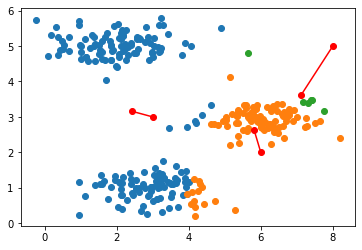

Press Enter


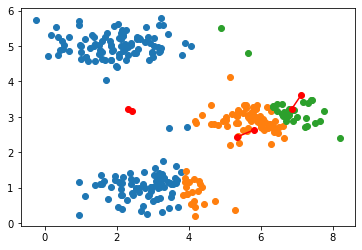

Press Enter


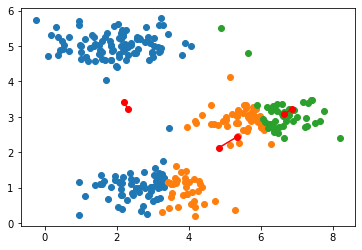

Press Enter


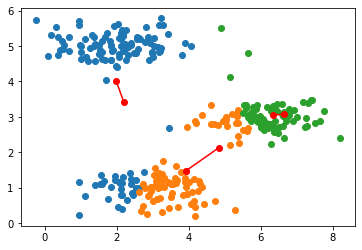

Press Enter


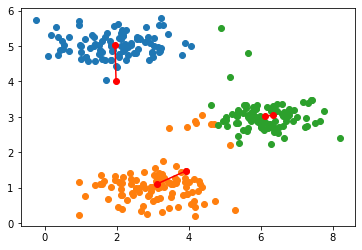

Press Enter


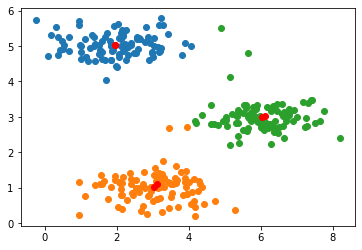

Press Enter


array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]])

In [17]:
runkMeans(X,K,max_iters,initial_centroids)

## 1.4 Random Initialization 

In [18]:
K = 5

In [19]:
def kMeansInitCentroids(X,K):
    index = np.random.choice(X.shape[0],K)
    print('index:',index)
    centroids = X[index]
    return centroids

In [20]:
centroids = kMeansInitCentroids(X,K)
print('centroids:',centroids)

index: [ 66 200  59  96 262]
centroids: [[2.26901428 4.61818883]
 [6.00506534 2.72784171]
 [1.36678395 5.26161095]
 [2.05670542 5.23391326]
 [7.65503226 2.87095628]]


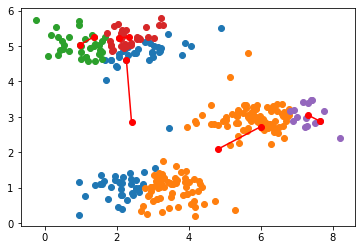

Press Enter


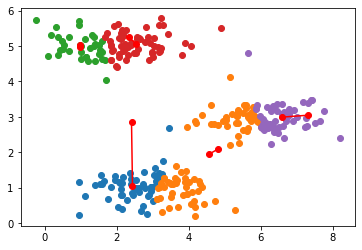

Press Enter


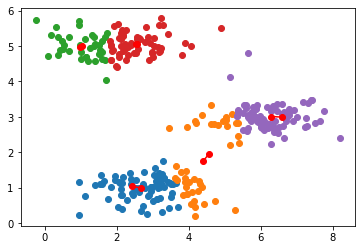

Press Enter


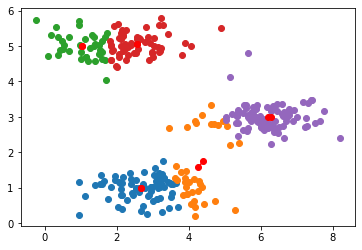

Press Enter


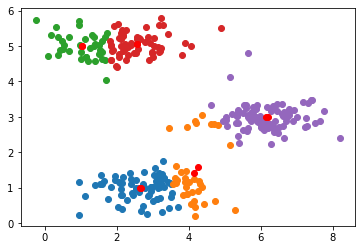

Press Enter


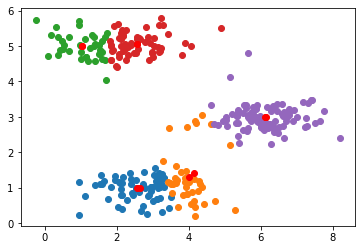

Press Enter


array([[2.57152205, 0.9798552 ],
       [4.01692768, 1.29192707],
       [1.0323955 , 5.00076462],
       [2.57620478, 5.04891014],
       [6.12727733, 2.98713068]])

In [23]:
runkMeans(X,K,max_iters,centroids)

## 1.5 Image Compression with K-means

In [35]:
import cv2

In [36]:
A = cv2.imread('bird_small.png')

In [37]:
cv2.imshow('img',A)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [52]:
A = A/255
img_size = A.size
A.shape

(128, 128, 3)

In [53]:
X = A.reshape(img_size,1)
X.shape

(49152, 1)

In [60]:
K = 6
max_iters = 6
centroids = kMeansInitCentroids(X,K)

index: [48922  8051  5514 30149 43475  3615]


In [61]:
cetroids = runkMeans(X,K,max_iters,centroids)

In [62]:
idx = findClosetCentroids(X, cetroids)

In [63]:
idx = idx.astype('int64')
X_rec = centroids[idx]

In [64]:
X_rec = X_rec.reshape(A.shape)
X_rec.shape

(128, 128, 3)

In [65]:
cv2.imshow('img',X_rec*255)
cv2.waitKey(0)
cv2.destroyAllWindows()